In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
skip_training = False

In [21]:
from pathlib import Path
import torch

import ppo_blackjack_agent as a
import ppo_blackjack_train as t
import utils as u

In [22]:
work_dir = Path().cwd()/'results'

In [23]:
cfg_args = {
    "exp_name": "ex1",
    "seed": 2025,
    "env_name": "Blackjack-v1",
    "model_name": "Blackjack-v1",
    "max_episode_steps": 100, # not relevant for Blackjack
    "train_episodes": 500000,
    "batch_size": 256,
    "min_update_samples": 5000,
    "testing": False,
    "model_path": "default",
    "save_video": True,
    "save_model": True,
    "save_logging": True,
    "silent": False,
    "use_wandb": True,
    "run_suffix": 0,
}

In [24]:
if not skip_training:
    t.train(cfg_args=cfg_args)

Numpy/Torch/Random Seed:  2025
Configuration Settings: {'exp_name': 'ex1', 'seed': 2025, 'env_name': 'Blackjack-v1', 'model_name': 'Blackjack-v1', 'max_episode_steps': 100, 'train_episodes': 500000, 'batch_size': 256, 'min_update_samples': 5000, 'testing': False, 'model_path': 'default', 'save_video': True, 'save_model': True, 'save_logging': True, 'silent': False, 'use_wandb': True, 'run_suffix': 0}
Training device: cuda
Observation space dimensions: 3
Action space dimensions: 2

Episode 0 finished. Average reward of last 100 steps: 0.0 (1 timesteps)


c:\Users\nikov\VS_code_projects\grpo-blackjack\env\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at c:\Users\nikov\VS_code_projects\grpo-blackjack\results\video\Blackjack-v1\train folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Episode 500 finished. Average reward of last 100 steps: -0.398 (2 timesteps)
Episode 1000 finished. Average reward of last 100 steps: -0.428 (1 timesteps)
Episode 1500 finished. Average reward of last 100 steps: -0.394 (2 timesteps)
Episode 2000 finished. Average reward of last 100 steps: -0.384 (1 timesteps)
Episode 2500 finished. Average reward of last 100 steps: -0.402 (1 timesteps)
Episode 3000 finished. Average reward of last 100 steps: -0.37 (1 timesteps)
Episode 3500 finished. Average reward of last 100 steps: -0.39 (1 timesteps)
Updating the policy...
Updating finished!
Episode 4000 finished. Average reward of last 100 steps: -0.386 (1 timesteps)
Episode 4500 finished. Average reward of last 100 steps: -0.324 (1 timesteps)
Episode 5000 finished. Average reward of last 100 steps: -0.334 (3 timesteps)
Episode 5500 finished. Average reward of last 100 steps: -0.302 (1 timesteps)
Episode 6000 finished. Average reward of last 100 steps: -0.298 (1 timesteps)
Episode 6500 finished. Av

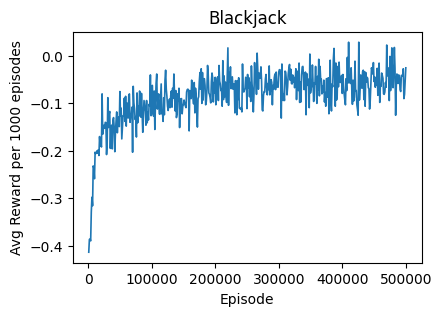

In [25]:
if not skip_training:
    u.plot_reward(Path().cwd()/'results'/'logging'/'Blackjack-v1_2025.csv', 'Blackjack')

In [26]:
model_path = work_dir / 'model' / f'{cfg_args["model_name"]}_params.pt'

observation_space_dim = 3
action_space_dim = 2
policy = a.Policy(observation_space_dim, action_space_dim)

print(f"Loading model from {model_path}...")
state_dict = torch.load(model_path, map_location='cuda')
policy.load_state_dict(state_dict)

policy.eval()

Loading model from c:\Users\nikov\VS_code_projects\grpo-blackjack\results\model\Blackjack-v1_params.pt...


Policy(
  (fc1_a): Linear(in_features=3, out_features=16, bias=True)
  (fc2_a): Linear(in_features=16, out_features=16, bias=True)
  (fc3_a): Linear(in_features=16, out_features=2, bias=True)
  (fc1_c): Linear(in_features=3, out_features=16, bias=True)
  (fc2_c): Linear(in_features=16, out_features=16, bias=True)
  (fc3_c): Linear(in_features=16, out_features=1, bias=True)
)

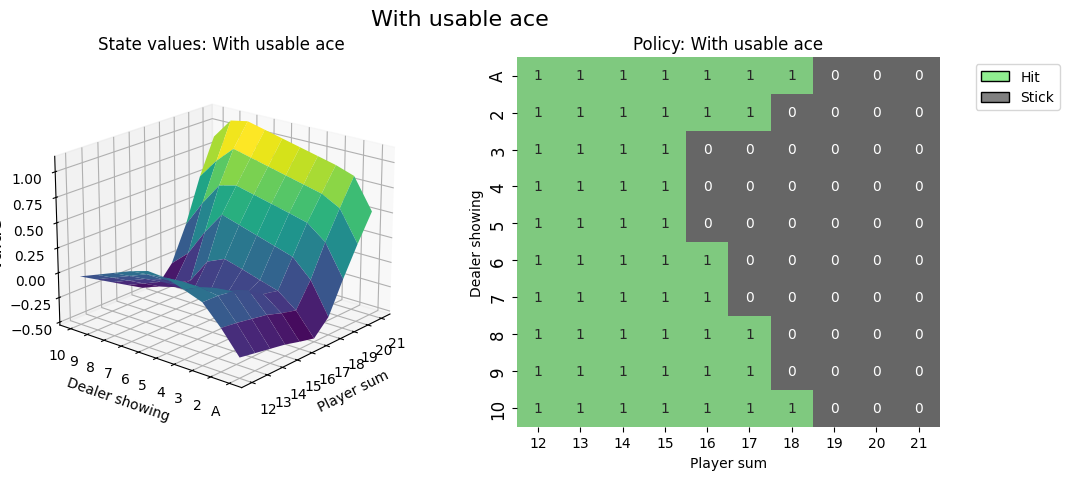

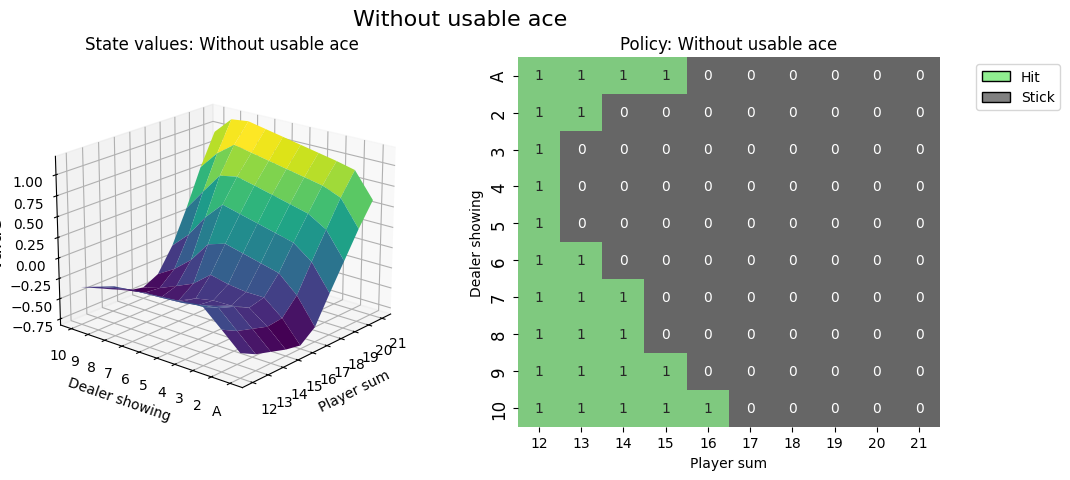

In [27]:
import matplotlib.pyplot as plt

value_grid_usable_ace, policy_grid_usable_ace = u.create_grids_nn(policy, usable_ace=True)
fig1 = u.create_plots(value_grid_usable_ace, policy_grid_usable_ace, title="With usable ace")
plt.show()

value_grid_no_ace, policy_grid_no_ace = u.create_grids_nn(policy, usable_ace=False)
fig2 = u.create_plots(value_grid_no_ace, policy_grid_no_ace, title="Without usable ace")
plt.show()


Overall it seems to converge to a reasonable policy, though not the optimal one. The differences are quite small and for edge cases longer training might still change some of the decisions.

A good benchmark for the problem can be found here: https://chisness.github.io/2020-09-21/monte-carlo-rl-and-blackjack

Their optimal policy, found with a Monte Carlo method after 10 million iterations is almost identical (there is a single difference) to the optimal policy proposed by Sutton and Barto in their RL book.

The method also seems better suitable for blackjack than PPO algorithm, but the point was to test that the implementation works for blackjack and based on this it does. For the absolute optimal policy hyperparameters, batch size and episode amount could be adjusted. With this policy the reward is about -0.050 when the optimal policy yields -0.047.